> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Analysis Movies a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
# load libraries it will be using them 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import csv

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# explore my data
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning

>Cleaning data from values and duplecate values

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# drop columns it will not using them
df.drop(["id", "imdb_id" , "cast" , "homepage" , "director" , "tagline" , "overview" , "keywords" ,"production_companies"] ,axis=1 , inplace=True)

In [6]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# Remove a Non values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10866 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10843 non-null  float64
 1   budget          10843 non-null  int64  
 2   revenue         10843 non-null  int64  
 3   original_title  10843 non-null  object 
 4   runtime         10843 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10843 non-null  object 
 7   vote_count      10843 non-null  int64  
 8   vote_average    10843 non-null  float64
 9   release_year    10843 non-null  int64  
 10  budget_adj      10843 non-null  float64
 11  revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [10]:
# remove duplicated values
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
# To make sure the data is correct

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10842 non-null  float64
 1   budget          10842 non-null  int64  
 2   revenue         10842 non-null  int64  
 3   original_title  10842 non-null  object 
 4   runtime         10842 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10842 non-null  object 
 7   vote_count      10842 non-null  int64  
 8   vote_average    10842 non-null  float64
 9   release_year    10842 non-null  int64  
 10  budget_adj      10842 non-null  float64
 11  revenue_adj     10842 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.



### Research Questions and Data Visualization 

## Detecting the duration of changes in movie data by calculating the runtime


In [13]:
#  find if the data is normal or not
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
# Markdown cells to document your observations and findings.
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


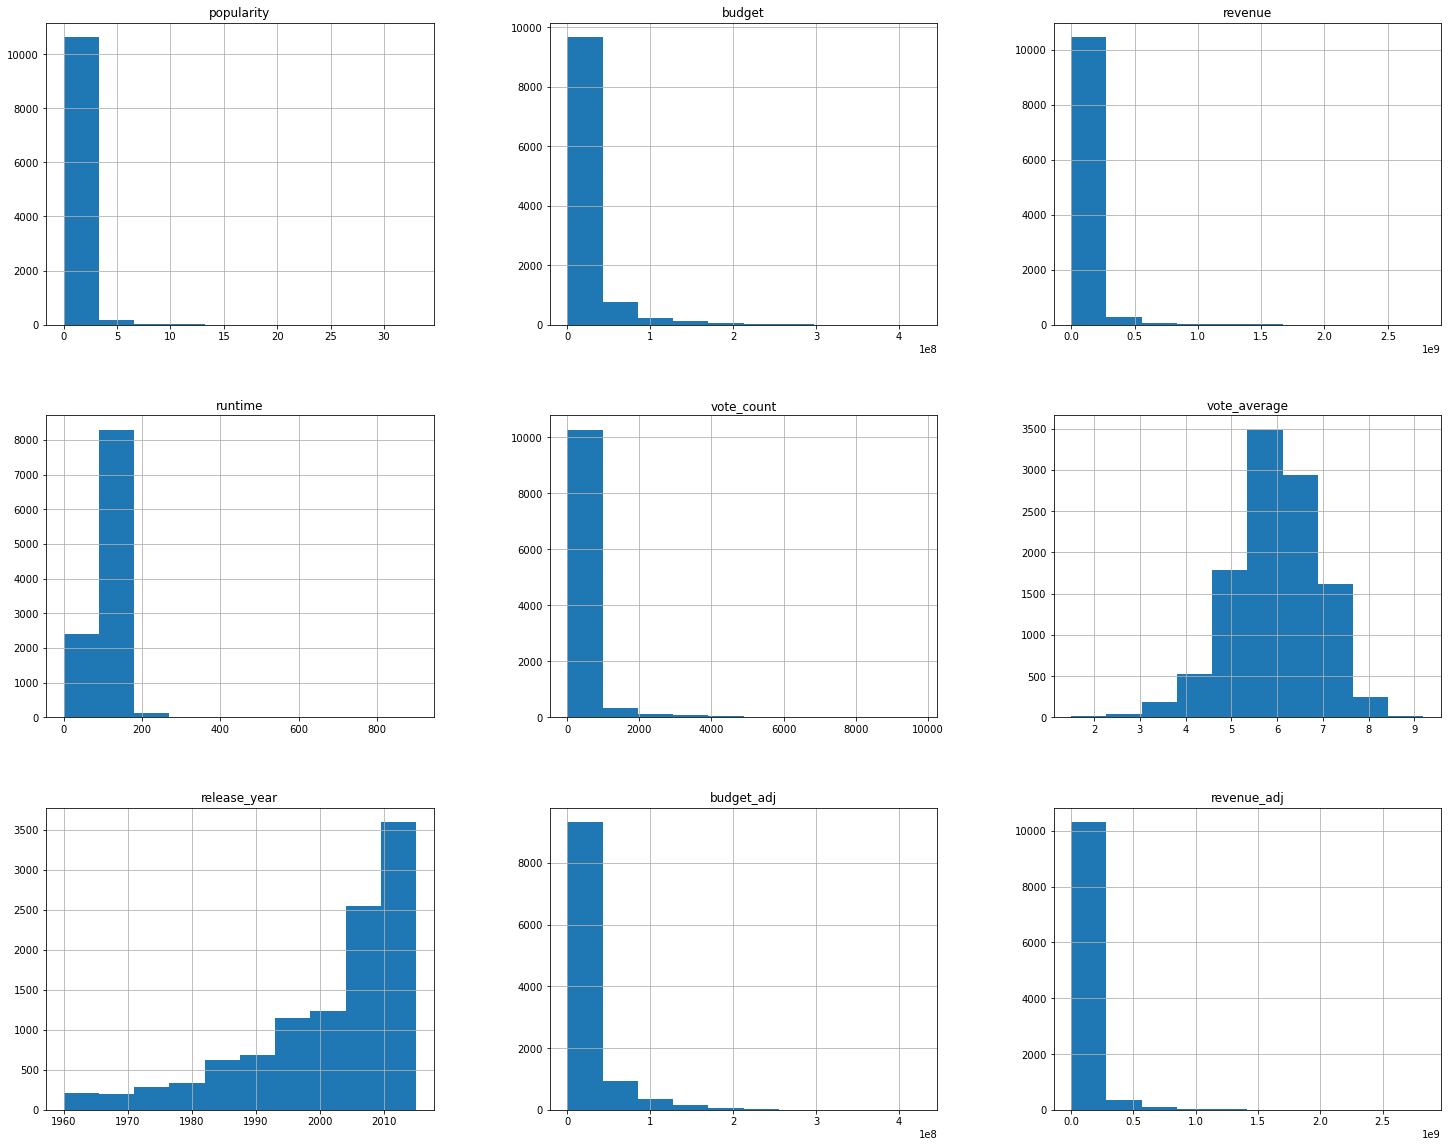

In [17]:
df.hist(figsize=(25 , 20));

### Question 1 : explore corelations between Data ?

In [16]:
#explore corelations between tables
corr= df.corr()
corr

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.545271,0.663268,0.138433,0.800786,0.210432,0.090200,0.513311,0.608964
budget,0.545271,1.000000,0.734851,0.191079,0.632601,0.081729,0.116312,0.968949,0.622406
revenue,0.663268,0.734851,1.000000,0.162755,0.791122,0.173254,0.057324,0.706360,0.919088
runtime,0.138433,0.191079,0.162755,1.000000,0.163187,0.158033,-0.117665,0.220955,0.175615
vote_count,0.800786,0.632601,0.791122,0.163187,1.000000,0.254698,0.108275,0.586923,0.707865
vote_average,0.210432,0.081729,0.173254,0.158033,0.254698,1.000000,-0.119851,0.093811,0.193836
release_year,0.090200,0.116312,0.057324,-0.117665,0.108275,-0.119851,1.000000,0.017076,-0.066118
budget_adj,0.513311,0.968949,0.706360,0.220955,0.586923,0.093811,0.017076,1.000000,0.646507
revenue_adj,0.608964,0.622406,0.919088,0.175615,0.707865,0.193836,-0.066118,0.646507,1.000000


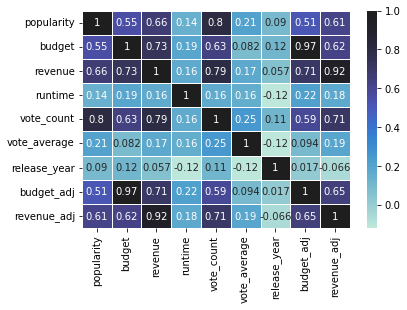

In [22]:
sns.heatmap(corr , annot=True , center=True , linewidths= 0.5 );

### Question 2: Whats is top 10 revenue movies?

In [111]:
# sorting data form big to small revenue to find top 10 movies in data

new_data = pd.DataFrame(df.revenue.sort_values(ascending=False))
new_data['original_title'] = df['original_title']
new_data.head(10)

,revenue,original_title
1386,2781505847,Avatar
3,2068178225,Star Wars: The Force Awakens
5231,1845034188,Titanic
4361,1519557910,The Avengers
0,1513528810,Jurassic World
4,1506249360,Furious 7
14,1405035767,Avengers: Age of Ultron
3374,1327817822,Harry Potter and the Deathly Hallows: Part 2
5422,1274219009,Frozen
5425,1215439994,Iron Man 3


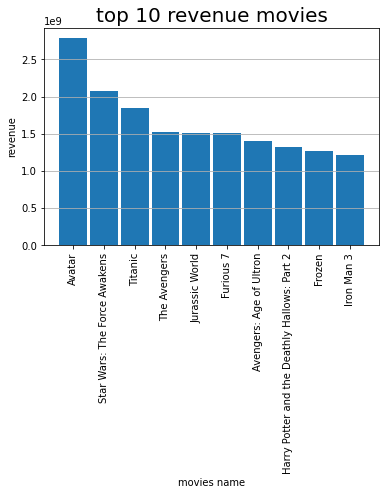

In [76]:
# representation this data 

# Create bars
plt.bar(new_data['original_title'][:10] , new_data['revenue'][:10] , width=.9);

# Rotation of the bar names
plt.xticks(rotation= 90)

#title name
plt.title('top 10 revenue movies' ,fontsize= 20 )

# (x, y) axis name
plt.xlabel('movies name')
plt.ylabel('revenue')

# show ylins in graph 
plt.grid(axis= 'y')

#show graph
plt.show()

## Results
> Avatar and Star Wars Achieve high revenue

## Question 3: Whats is top 10 Budget movies?

In [77]:
top_b = pd.DataFrame(df.budget.sort_values(ascending=False))
top_b['original_title'] = df['original_title']
top_b

,budget,original_title
2244,425000000,The Warrior's Way
3375,380000000,Pirates of the Caribbean: On Stranger Tides
7387,300000000,Pirates of the Caribbean: At World's End
14,280000000,Avengers: Age of Ultron
6570,270000000,Superman Returns
...,...,...
7040,0,Sniper 3
3269,0,Gardens of the Night
3270,0,Global Metal
3271,0,Bad Biology


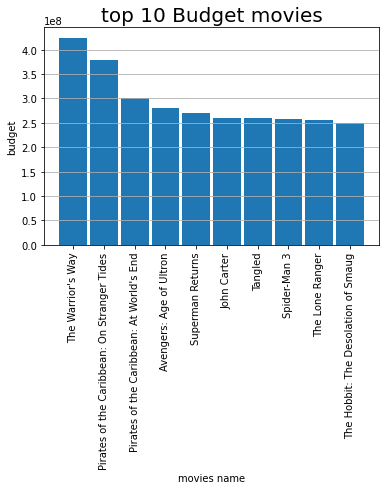

In [118]:
plt.bar( top_b["original_title"][:10] , top_b["budget"][:10] ,width=.9);

# Rotation of the bar names
plt.xticks(rotation= 90)

#title name
plt.title('top 10 Budget movies' ,fontsize= 20 )

# (x, y) axis name
plt.xlabel('movies name')
plt.ylabel('budget')

# show ylins in graph 
plt.grid(axis= 'y')

#show graph
plt.show()

## Results
> The Warrior's Way and Pirates of the Caribbean: On Stranger Tides Achieve high budget

# show r_graph , b_graph in one graph

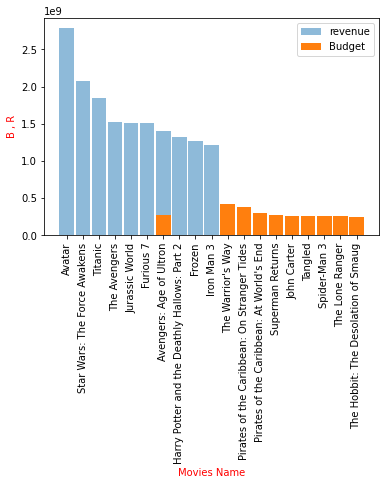

In [117]:

plt.bar(new_data['original_title'][:10] , new_data['revenue'][:10] , width=.9 , label= "revenue", alpha= .5);
plt.bar( top_b["original_title"][:10] , top_b["budget"][:10] ,width=.9 , label= "Budget");

plt.xlabel('Movies Name' ,c='r')
plt.ylabel('B , R' , c= 'r')
plt.xticks(rotation = 90)

plt.legend()

plt.show()

## Results
> Avatar Achieve high revenue and The Warrior's Way Achieve high budget

### Question 4: What is Top 5 Movies are popularity ?

In [120]:
# creat abovit table for visual data

df_pop=df.pivot_table(values='popularity',index="original_title").sort_values(ascending=False,by='popularity').head(5)
df_pop

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507


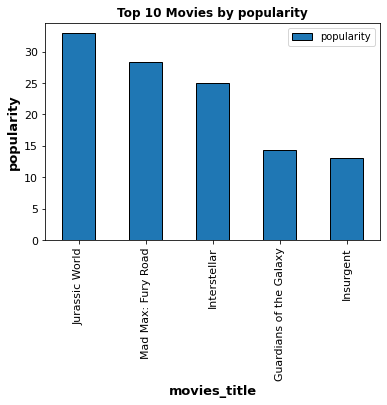

In [110]:
# make agraph
df_pop.plot(kind='bar',fontsize=11,edgecolor='black');

# title name
plt.title('Top 10 Movies by popularity',weight='bold')

#x, y lable name
plt.ylabel('popularity',fontsize=13, weight='bold');
plt.xlabel('movies_title',fontsize=13, weight='bold');


## Results
> After Analysis And Visulaization I found That Movie Jurassic World get high popularity from all movies it take about (32.985763)  

In [119]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1